In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# Load the preprocessed dataset
df = pd.read_csv('preprocessed_crop_production.csv')

# Drop categorical columns (already encoded) and target variable
X = df.drop(columns=['state_name', 'district_name', 'season', 'crop', 'yield'])
y = df['yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=11, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=11, random_state=42)

In [5]:
import joblib

In [7]:
joblib.dump(model, 'rfr_model.pkl')
print("Model trained")

Model trained


In [6]:
model = joblib.load('rfr_model.pkl')
print("Model loaded")

Model loaded


In [7]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)

In [11]:
shap_values = explainer.shap_values(X_test)

In [12]:
joblib.dump(model, 'rfr_shap_values.pkl')
print("Shap Values saved")

Shap Values saved


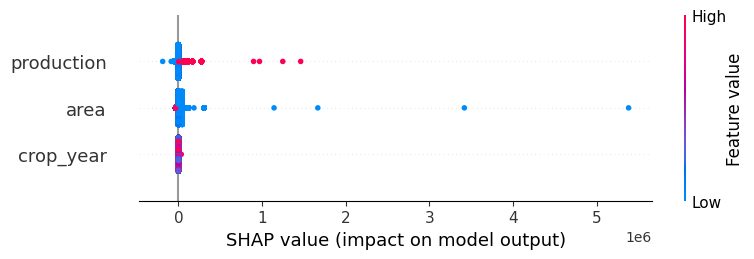

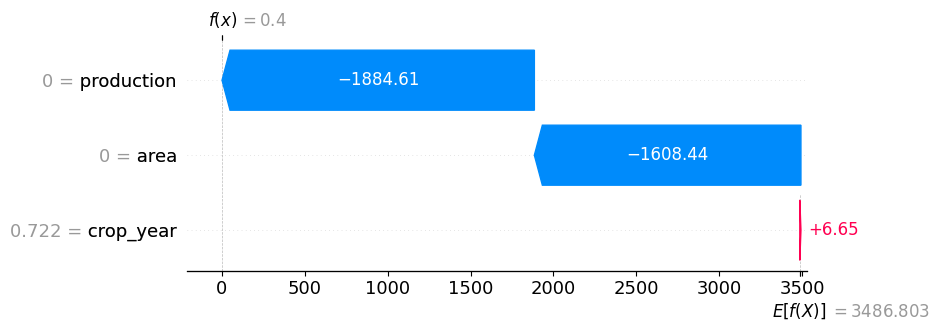

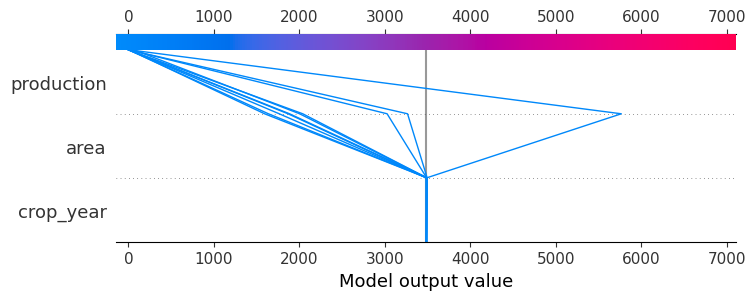

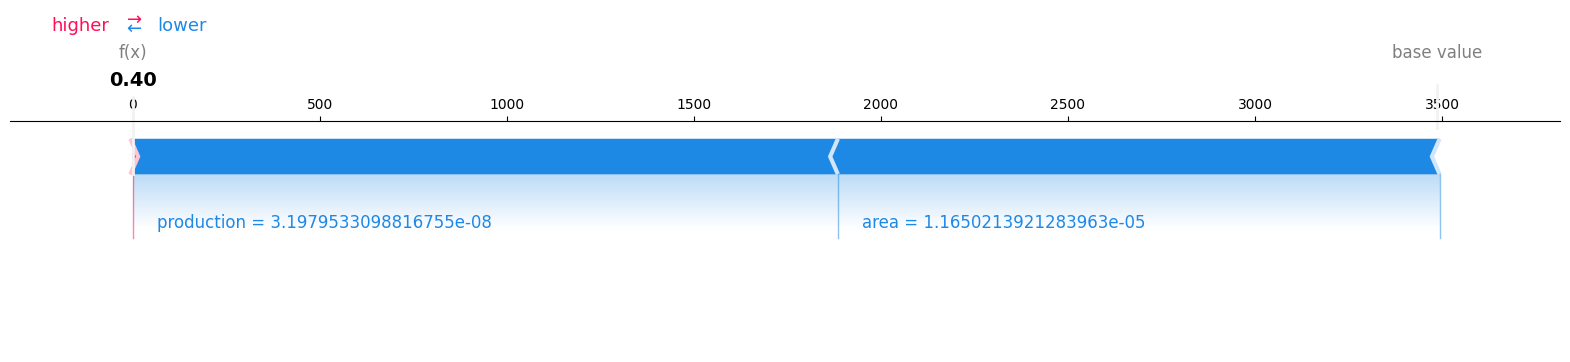

In [24]:
import shap
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model and SHAP values
model = joblib.load("rfr_shap_values.pkl")

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Ensure SHAP values are 2D
if isinstance(shap_values, list):  
    shap_values = np.array(shap_values)

if len(shap_values.shape) == 1:  
    shap_values = shap_values.reshape(-1, 1)

# 1️⃣ **SHAP Summary Plot**
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# 2️⃣ **SHAP Waterfall Plot (for a single prediction)**
sample_index = 2  # Change index as needed
shap.waterfall_plot(shap.Explanation(values=shap_values[sample_index], 
                                     base_values=explainer.expected_value, 
                                     data=X_test.iloc[sample_index], 
                                     feature_names=X_test.columns))

# 3️⃣ **SHAP Decision Plot (for multiple predictions)**
shap.decision_plot(explainer.expected_value, shap_values[:10], X_test.iloc[:10])

# 4️⃣ **SHAP Force Plot (for a single prediction)**
shap.force_plot(explainer.expected_value, 
                shap_values[sample_index],  
                X_test.iloc[sample_index], 
                matplotlib=True)

plt.show()  # Show all plots
